# <span style="color:blue"> Laboratorio di simulazione numerica (LSN) </span>

## <span style="color:green">  Esercitazione numerica 10</span>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

### Esercizio 10.1

L'obiettivo della decima esercitazione è modificare il codice dell'esercitazione precedente in modo che sia in grado di risolvere il problema del commesso viaggiatore tramite **Simulated Annealing**(SA).
In particolare si utilizzano le mutazioni implementate precedentemente scegliendole casualmente.

Per poter avere un metro di paragone ho applicato l'algoritmo alle 32 città, generate su una circonferenza e in un quadrato, con la stessa disposizione dell'esercitazione precedente.

Coi dati ottenuti ho prodotto i grafici della lunghezza ottimizzata in funzione del numero di iterazioni dell'algoritmo SA e prodotto due immagini dei percorsi generati in entrambi i mondi (circolare e quadrato). 
Ho inoltre confrontato i risultati con quelli ottenuti tramite Algoritmo Genetico.

I parametri scelti per la simulazione sono:

- Temperatura iniziale $T_{init}=1.5;
- Delta di temperatura $\Delta T=0.001$;
- Step Monte Carlo per temperatura: $100$.

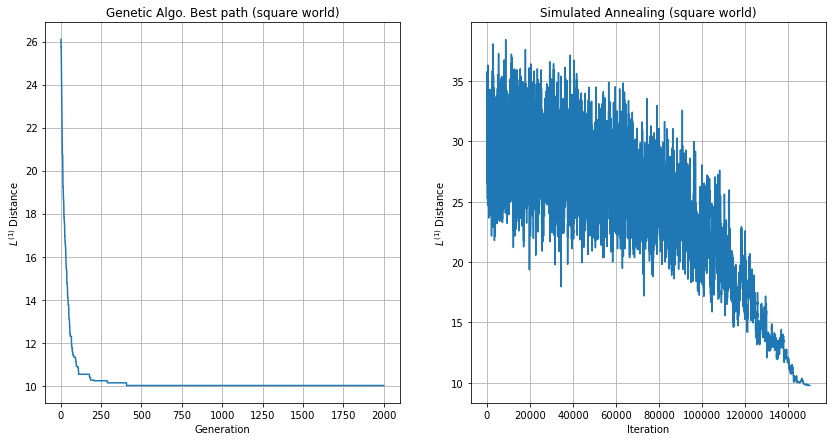

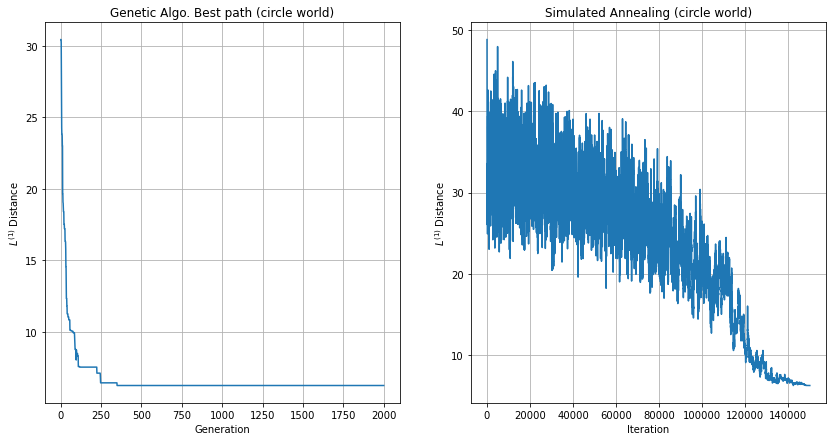

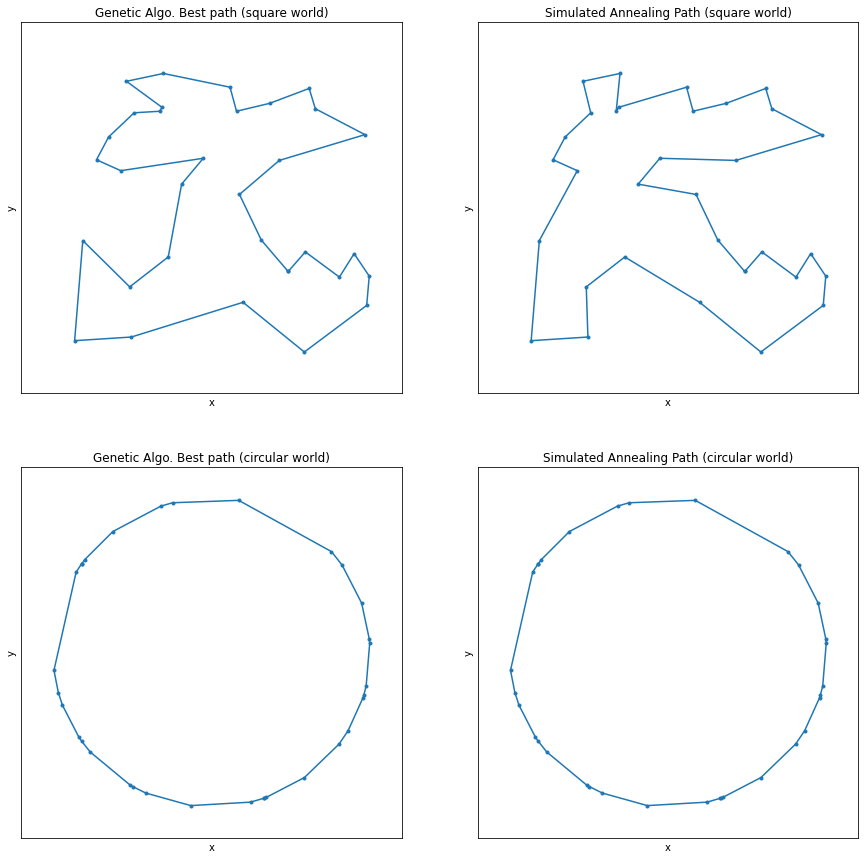

In [7]:
# Load data square world (SA)
x_sq_distance, y_sq_distance = np.loadtxt("../results/exercise_10.1/square/path_distance.dat", unpack = True, usecols=(0,2))
x_sq_path, y_sq_path = np.loadtxt("../results/exercise_10.1/square/path.dat", unpack = True)
# Load data circle world (SA)
x_circ_distance, y_circ_distance = np.loadtxt("../results/exercise_10.1/circle/path_distance.dat", unpack = True, usecols=(0,2))
x_circ_path, y_circ_path = np.loadtxt("../results/exercise_10.1/circle/path.dat", unpack = True)
# Load data square world (GA)
x_sq_best, y_sq_best = np.loadtxt("../../NSL-09/results/square/distance_of_best_path.dat", unpack = True)
x_sq_path_GA, y_sq_path_GA = np.loadtxt("../../NSL-09/results/square/best_path.dat", unpack = True)
# Load data circle world (GA)
x_circ_best, y_circ_best = np.loadtxt("../../NSL-09/results/circle/distance_of_best_path.dat", unpack = True)
x_circ_path_GA, y_circ_path_GA = np.loadtxt("../../NSL-09/results/circle/best_path.dat", unpack = True)


# Plot L1 distance (square world)
plt.figure(1, figsize = (14, 7))
# Genetic Algo
plt.subplot(1, 2, 1)
plt.title("Genetic Algo. Best path (square world)")
plt.plot(x_sq_best, y_sq_best)
plt.xlabel('Generation')
plt.ylabel('$L^{(1)}$ Distance')
plt.grid(True)
# Simulated Annealing
plt.subplot(1, 2, 2)
plt.title("Simulated Annealing (square world)")
plt.plot(x_sq_distance, y_sq_distance)
plt.xlabel('Iteration')
plt.ylabel('$L^{(1)}$ Distance')
plt.grid(True)
# Plot L1 distance (circle world)
plt.figure(2, figsize = (14, 7))
# Genetic Algo
plt.subplot(1, 2, 1)
plt.title("Genetic Algo. Best path (circle world)")
plt.plot(x_circ_best, y_circ_best)
plt.xlabel('Generation')
plt.ylabel('$L^{(1)}$ Distance')
plt.grid(True)
# Simulated Annealing
plt.subplot(1, 2, 2)
plt.title("Simulated Annealing (circle world)")
plt.plot(x_circ_distance, y_circ_distance)
plt.xlabel('Iteration')
plt.ylabel('$L^{(1)}$ Distance')
plt.grid(True)

# Plot path 
plt.figure(3, figsize = (15, 15))
# Square world
# Genetic Algo
plt.subplot(2, 2, 1)
plt.title("Genetic Algo. Best path (square world)")
plt.plot(x_sq_path_GA, y_sq_path_GA,  marker=".")
plt.xlabel('x')
plt.ylabel('y')
plt.xlim((-1.2, 1.2))
plt.ylim((-1.2, 1.2))
plt.xticks([])
plt.yticks([])

# Simulated Annealing
plt.subplot(2, 2, 2)
plt.title("Simulated Annealing Path (square world)")
plt.plot(x_sq_path, y_sq_path,  marker=".")
plt.xlabel('x')
plt.ylabel('y')
plt.xlim((-1.2, 1.2))
plt.ylim((-1.2, 1.2))
plt.xticks([])
plt.yticks([])
# Circle world
# Genetic Algo
plt.subplot(2, 2, 3)
plt.title("Genetic Algo. Best path (circular world)")
plt.plot(x_circ_path_GA, y_circ_path_GA,  marker=".")
plt.xlabel('x')
plt.ylabel('y')
plt.xlim((-1.2, 1.2))
plt.ylim((-1.2, 1.2))
plt.xticks([])
plt.yticks([])
# Simulated Annealing
plt.subplot(2, 2, 4) 
plt.title("Simulated Annealing Path (circular world)")
plt.plot(x_circ_path, y_circ_path,  marker=".")
plt.xlabel('x')
plt.ylabel('y')
plt.xlim((-1.2, 1.2))
plt.ylim((-1.2, 1.2))
plt.xticks([])
plt.yticks([])

plt.show()


### Esercizio 10.2

In questo esercizio ho utilizzato la libreria MPI per parallelizzare l'Algoritmo Genetico (GA) dell'esercitazione 9. Ho dunque risolto il problema del commesso viaggiatore facendo 4 ricerche parallele del miglior percorso tramite GA: ogni nodo ha eseguito una ricerca indipendente (detta *Continenti*) ed ogni $N_{migr}=200$ generazioni (delle $2000$ totali per nodo) ho fatto in modo che i *Continenti* si scambiassero casualmente i loro migliori individui.

Per fare ciò ho utilizzato la funzione `MPI_Allgather()` che mi permette di avere dentro ogni nodo una copia di ogni miglior-percorso di ciascuno dei nodi, ossia un vettore di dimensioni $N_{città}\times N_{nodi}$. Ogni nodo seleziona casualmente, con probabilità uniforme, una porzione di questo vettore.

Ho applicato il mio algoritmo alle 32 città generate casualmente in un quadrato (la cui soluzione è non banale) degli esercizi precedenti, in modo da avere un metro di paragone.

Per stimare il miglioramento nella ricerca effettuata nei singoli nodi ad ogni migrazione tra *Continenti*, ho creato un grafico delle distanze $L^{(1)}$ del miglior percorso in funzione del numero di generazioni di ciascun nodo e l'ho confrontato con quello del codice non parallelizzato dell'esercitazione 9 per vedere se converge più velocemente.

Riporto anche il miglior percorso del root-node per confrontarlo con quello dell'algoritmo genetico non parallelizzato.

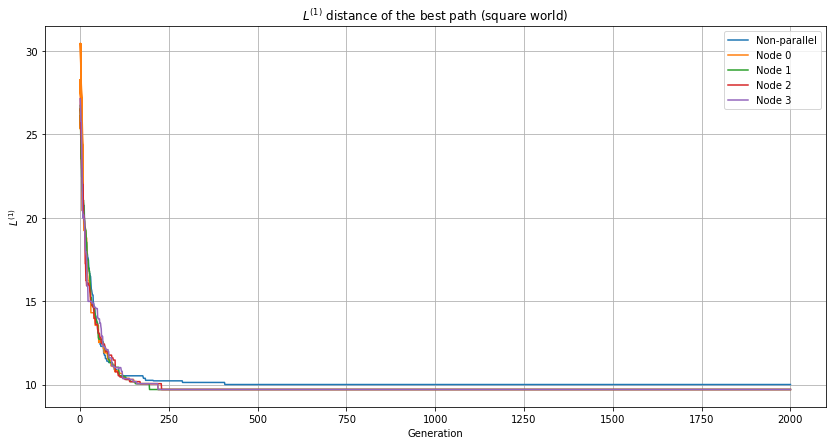

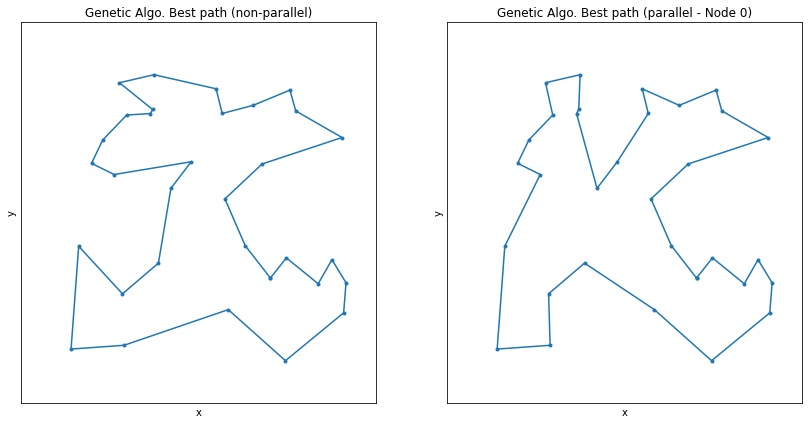

In [8]:
x_sq_0, y_sq_0 = np.loadtxt("../results/exercise_10.2/square/distance_of_best_path_node0.dat", unpack = True)
x_sq_1, y_sq_1 = np.loadtxt("../results/exercise_10.2/square/distance_of_best_path_node1.dat", unpack = True)
x_sq_2, y_sq_2 = np.loadtxt("../results/exercise_10.2/square/distance_of_best_path_node2.dat", unpack = True)
x_sq_3, y_sq_3 = np.loadtxt("../results/exercise_10.2/square/distance_of_best_path_node3.dat", unpack = True)
x_sq_path_mpi, y_sq_path_mpi = np.loadtxt("../results/exercise_10.2/square/best_path_node0.dat", unpack = True)

#x_circ_0, y_circ_0 = np.loadtxt("../results/exercise_10.2/circle/distance_of_best_path_node0.dat", unpack = True)
#x_circ_1, y_circ_1 = np.loadtxt("../results/exercise_10.2/circle/distance_of_best_path_node1.dat", unpack = True)
#x_circ_2, y_circ_2 = np.loadtxt("../results/exercise_10.2/circle/distance_of_best_path_node2.dat", unpack = True)
#x_circ_3, y_circ_3 = np.loadtxt("../results/exercise_10.2/circle/distance_of_best_path_node3.dat", unpack = True)
#x_circ_path_mpi, y_circ_path_mpi = np.loadtxt("Exercise_02/data/circle/best_path.dat", unpack = True)

plt.figure(1, figsize = (14, 7))
plt.title("$L^{(1)}$ distance of the best path (square world)")
plt.plot(x_sq_best, y_sq_best, label="Non-parallel")
plt.plot(x_sq_0, y_sq_0, label="Node 0")
plt.plot(x_sq_1, y_sq_1, label="Node 1")
plt.plot(x_sq_2, y_sq_2, label="Node 2")
plt.plot(x_sq_3, y_sq_3, label="Node 3")
plt.xlabel('Generation')
plt.ylabel('$L^{(1)}$')
#plt.xlim(0,200)
plt.grid(True)
plt.legend()

plt.figure(3, figsize = (14, 7))
# Non-parallel
plt.subplot(1, 2, 1)
plt.title("Genetic Algo. Best path (non-parallel)")
plt.plot(x_sq_path_GA, y_sq_path_GA,  marker=".")
plt.xlabel('x')
plt.ylabel('y')
plt.xlim((-1.2, 1.2))
plt.ylim((-1.2, 1.2))
plt.xticks([])
plt.yticks([])
# Root node (parallel algo)
plt.subplot(1, 2, 2)
plt.title("Genetic Algo. Best path (parallel - Node 0)")
plt.plot(x_sq_path_mpi, y_sq_path_mpi,  marker=".")
plt.xlabel('x')
plt.ylabel('y')
plt.xlim((-1.2, 1.2))
plt.ylim((-1.2, 1.2))
plt.xticks([])
plt.yticks([])

plt.show()


Le performance dell'algoritmo parallelizzato sembrano essere migliori convergendo più velocemnte al valore limite. Tuttavia il percorso trovato è diverso rispetto a quello trovato con l'algoritmo non parallelizzato, anche se in parte coincidono.